In [1]:
#import dicom
import pydicom as dc
import os
import numpy as np
import matplotlib as plt
import natsort as ns
import cv2
#print(cv2.__version__)
#%pylab inline
#import imutils
#import scipy
from scipy import ndimage
from matplotlib import pyplot
import imutils
import dicom_functions as dcf

In [2]:
# Use dc_filepaths() to get list of DICOM filepaths:

dataDir = r'C:\\DICOM'

fpaths = dcf.dc_filepaths(dataDir)

fpaths

['C:\\\\DICOM\\1.2.840.113564.9.1.2728161578.69.2.5000234587-3-1-1agdtdh.dcm',
 'C:\\\\DICOM\\1.2.840.113564.9.1.2728161578.69.2.5000234587-3-2-yrftpu.dcm',
 'C:\\\\DICOM\\1.2.840.113564.9.1.2728161578.69.2.5000234587-3-3-124yyoi.dcm',
 'C:\\\\DICOM\\1.2.840.113564.9.1.2728161578.69.2.5000234587-3-4-17bvova.dcm',
 'C:\\\\DICOM\\1.2.840.113564.9.1.2728161578.69.2.5000234587-3-5-1vwicuk.dcm',
 'C:\\\\DICOM\\1.2.840.113564.9.1.2728161578.69.2.5000234587-3-6-env7ks.dcm',
 'C:\\\\DICOM\\1.2.840.113564.9.1.2728161578.69.2.5000234587-3-7-18o16bc.dcm',
 'C:\\\\DICOM\\1.2.840.113564.9.1.2728161578.69.2.5000234587-3-8-1p4zcjn.dcm',
 'C:\\\\DICOM\\1.2.840.113564.9.1.2728161578.69.2.5000234587-3-9-x046nu.dcm',
 'C:\\\\DICOM\\1.2.840.113564.9.1.2728161578.69.2.5000234587-3-10-vksk1o.dcm',
 'C:\\\\DICOM\\1.2.840.113564.9.1.2728161578.69.2.5000234587-3-11-1ufv18u.dcm',
 'C:\\\\DICOM\\1.2.840.113564.9.1.2728161578.69.2.5000234587-3-12-gas2aw.dcm',
 'C:\\\\DICOM\\1.2.840.113564.9.1.2728161578.69.2.5000

In [3]:
# Use dc_to_np() to load DICOM images and store to numpy array:

x, y, z, frames = dcf.dc_to_np(fpaths)

frames.shape

#frames.shape[2]

(384, 384, 22)

In [4]:
# Use segment_masks() to create bodyMasks, breastMasks and backgroundMasks:

bodyMasks, breastMasks, backgroundMasks = dcf.segment_masks(frames) # takes ~15 s

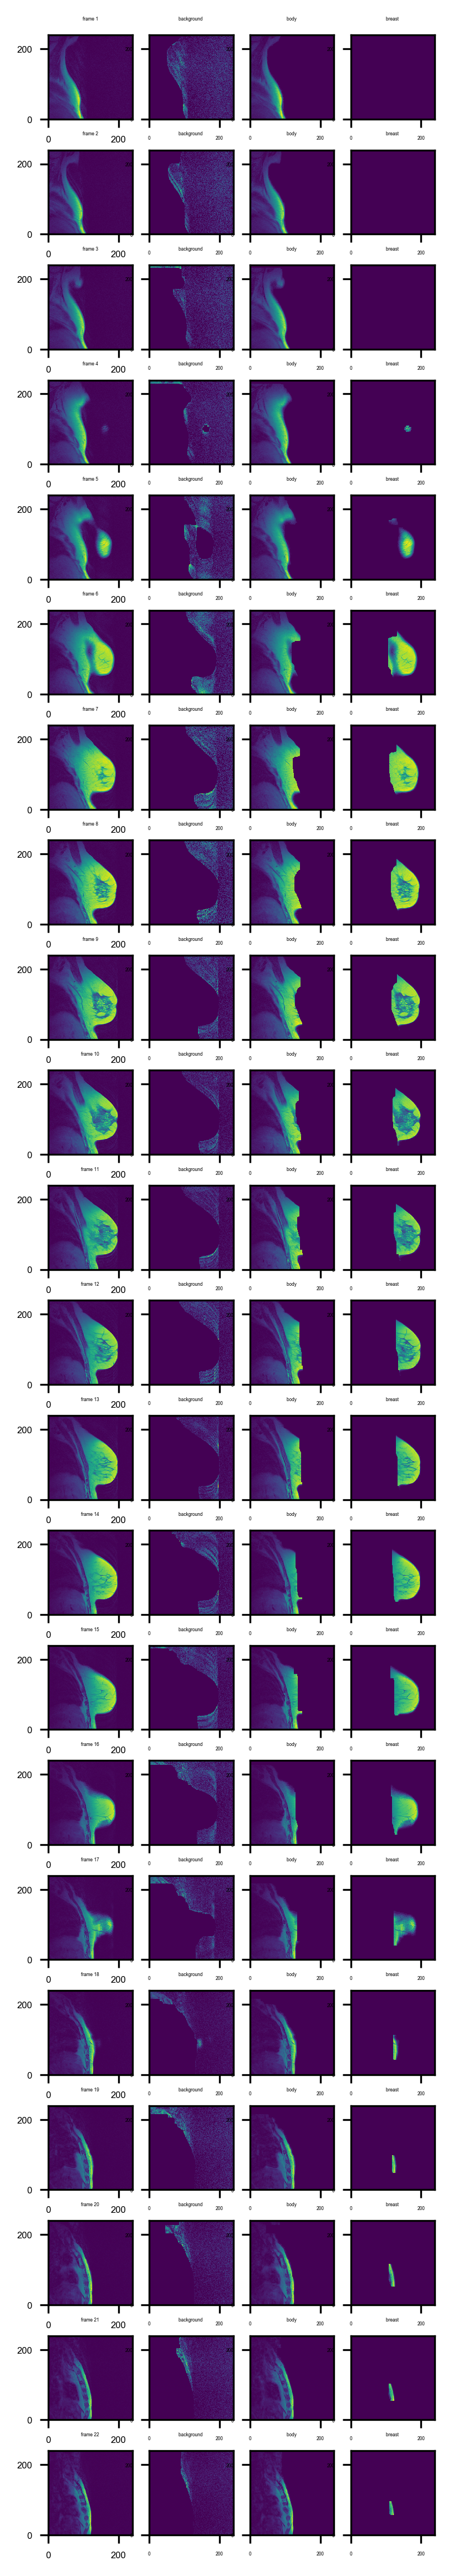

In [7]:
# Show results for 2 blur operations:

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'2', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'6'}


pyplot.figure(figsize=(3, 20), dpi=300)

i = 0 # for subplot pos

# Set the subplot column number:
cols = 4

dimZ = frames.shape[2]

for f in range(dimZ):
    #print('Working on frame', str(f+1), 'of', str(dimZ), '...')
    
    # Define masks for this frame:
    backgroundMask = backgroundMasks[:,:,f]
    bodyMask = bodyMasks[:,:,f]
    breastMask = breastMasks[:,:,f]
    
    # This frame:
    frame = frames[:,:,f]
    
    # Background, body and breast for this frame:
    background = frame*backgroundMask
    body = frame*bodyMask
    breast = frame*breastMask
    
    # Plot frame, background, body and breast:
    
    i = i + 1    
    ax = pyplot.subplot(dimZ,cols,i, aspect='equal')
    pyplot.pcolormesh(x, y, frame);
    pyplot.title('frame ' + str(f+1), **title_font)

    # Set the tick labels font
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(4)
    
    
    i = i + 1  
    ax = pyplot.subplot(dimZ,cols,i, aspect='equal')
    pyplot.pcolormesh(x, y, background);
    pyplot.title('background ', **title_font)

    # Set the tick labels font
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(2)
        
        
    i = i + 1
    ax = pyplot.subplot(dimZ,cols,i, aspect='equal')
    pyplot.pcolormesh(x, y, body);
    pyplot.title('body ', **title_font)

    # Set the tick labels font
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(2)


    
    i = i + 1
    ax = pyplot.subplot(dimZ,cols,i, aspect='equal')
    pyplot.pcolormesh(x, y, breast);
    pyplot.title('breast ', **title_font)

    # Set the tick labels font
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(2)
        

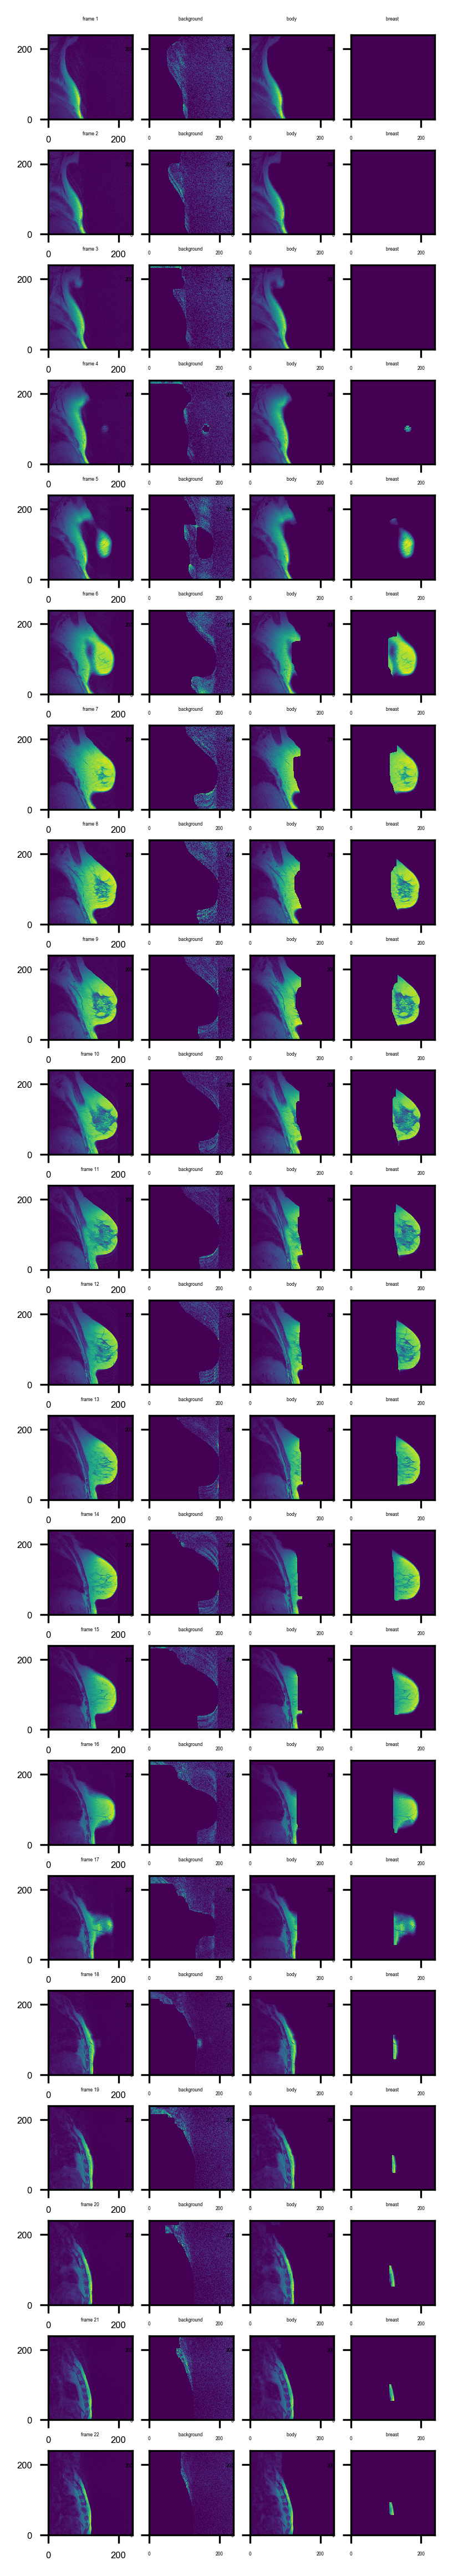

In [5]:
# Show results for 3 blur operations:

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'2', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'6'}


pyplot.figure(figsize=(3, 20), dpi=300)

i = 0 # for subplot pos

# Set the subplot column number:
cols = 4

dimZ = frames.shape[2]

for f in range(dimZ):
    #print('Working on frame', str(f+1), 'of', str(dimZ), '...')
    
    # Define masks for this frame:
    backgroundMask = backgroundMasks[:,:,f]
    bodyMask = bodyMasks[:,:,f]
    breastMask = breastMasks[:,:,f]
    
    # This frame:
    frame = frames[:,:,f]
    
    # Background, body and breast for this frame:
    background = frame*backgroundMask
    body = frame*bodyMask
    breast = frame*breastMask
    
    # Plot frame, background, body and breast:
    
    i = i + 1    
    ax = pyplot.subplot(dimZ,cols,i, aspect='equal')
    pyplot.pcolormesh(x, y, frame);
    pyplot.title('frame ' + str(f+1), **title_font)

    # Set the tick labels font
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(4)
    
    
    i = i + 1  
    ax = pyplot.subplot(dimZ,cols,i, aspect='equal')
    pyplot.pcolormesh(x, y, background);
    pyplot.title('background ', **title_font)

    # Set the tick labels font
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(2)
        
        
    i = i + 1
    ax = pyplot.subplot(dimZ,cols,i, aspect='equal')
    pyplot.pcolormesh(x, y, body);
    pyplot.title('body ', **title_font)

    # Set the tick labels font
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(2)


    
    i = i + 1
    ax = pyplot.subplot(dimZ,cols,i, aspect='equal')
    pyplot.pcolormesh(x, y, breast);
    pyplot.title('breast ', **title_font)

    # Set the tick labels font
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Arial')
        label.set_fontsize(2)
        